In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ctapipe.instrument.camera import CameraGeometry

from dl1_data_handler.image_mapper import ImageMapper

In [2]:
# Define the camera types and mapping methods
hex_cams = ['LSTCam', 'FlashCam', 'NectarCam', 'DigiCam', 'VERITAS',
            'MAGICCam', 'FACT', 'HESS-I', 'HESS-II']
square_cams = ['SCTCam', 'CHEC', 'ASTRICam']
camera_types = hex_cams + square_cams
hex_methods = ['oversampling', 'rebinning', 'nearest_interpolation',
               'bilinear_interpolation', 'bicubic_interpolation', 
               'image_shifting', 'axial_addressing']
square_methods = ['oversampling', 'rebinning', 'nearest_interpolation',
                  'bilinear_interpolation', 'bicubic_interpolation']

In [3]:
# Load the image mappers
mappers = {}
print("Initialization time (total for all telescopes):")
for method in hex_methods:
    print(method)
    mapping_method = {cam: method for cam in hex_cams}
    for cam in square_cams:
        mapping_method[cam] = method if method in square_methods else 'oversampling'
    %timeit mappers[method] = ImageMapper(mapping_method=mapping_method)

Initialization time (total for all telescopes):
oversampling
4.22 s ± 82.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
rebinning
16.1 s ± 355 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
nearest_interpolation
4.4 s ± 474 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
bilinear_interpolation
8.46 s ± 356 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
bicubic_interpolation
32.3 s ± 723 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
image_shifting
2.93 s ± 133 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
axial_addressing
3.01 s ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
print("Initialization time for individual telescopes (oversampling):")
for cam in camera_types:
    print(cam)
    %timeit ImageMapper(camera_types=[cam])

Initialization time for individual telescopes (oversampling):
LSTCam
322 ms ± 6.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
FlashCam
318 ms ± 9.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
NectarCam
325 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
DigiCam
188 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
VERITAS
42.6 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
MAGICCam
113 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
FACT
182 ms ± 450 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
HESS-I
86 ms ± 654 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
HESS-II
310 ms ± 529 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
SCTCam
1.98 s ± 31.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
CHEC
97 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
ASTRICam
128 ms ± 3.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
# Generate test pixel values (value is the pixel number)
test_pixel_values = {}
for cam in camera_types:
    num_pixels = len(CameraGeometry.from_name(cam).pix_id)
    test_pixel_values[cam] = np.arange(num_pixels)
    test_pixel_values[cam] = np.expand_dims(test_pixel_values[cam], axis=1)

In [6]:
def plot_image(image):
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(image[:,:,0], cmap='viridis')
    plt.show()

LSTCam: Default


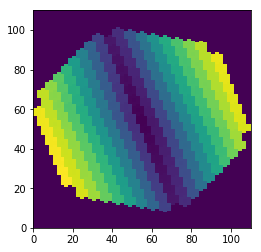

LSTCam: Padding


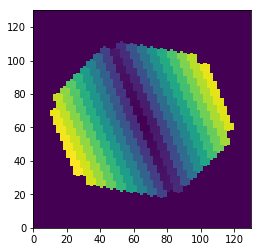

FlashCam: Default


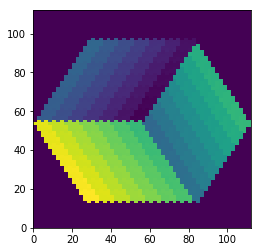

FlashCam: Padding


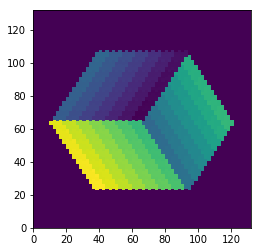

NectarCam: Default


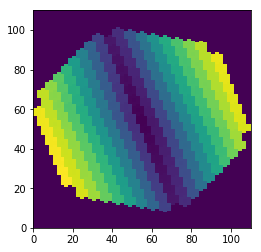

NectarCam: Padding


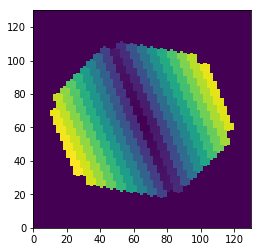

DigiCam: Default


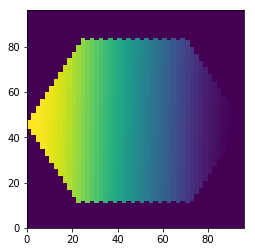

DigiCam: Padding


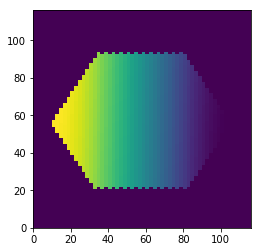

VERITAS: Default


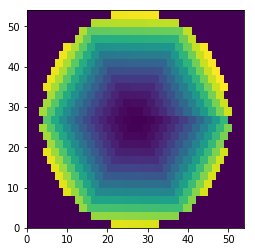

VERITAS: Padding


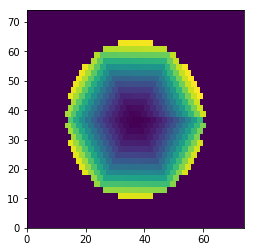

MAGICCam: Default


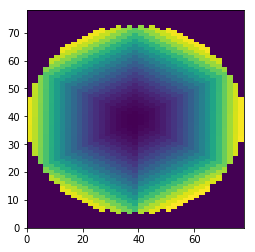

MAGICCam: Padding


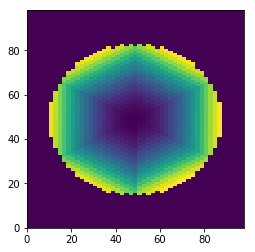

FACT: Default


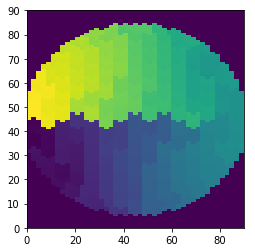

FACT: Padding


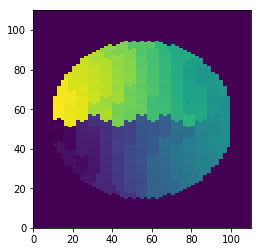

HESS-I: Default


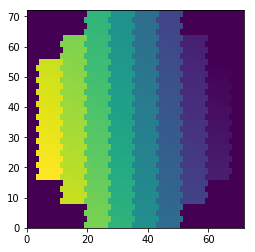

HESS-I: Padding


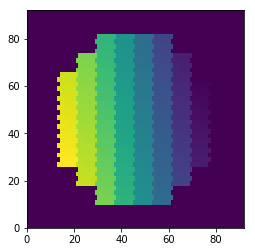

HESS-II: Default


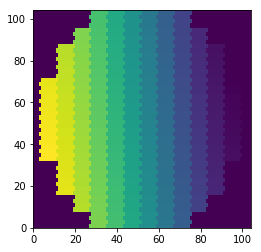

HESS-II: Padding


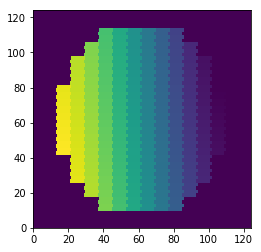

SCTCam: Default


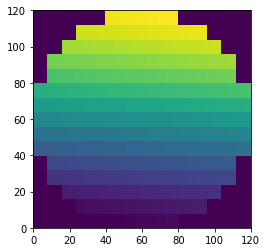

SCTCam: Padding


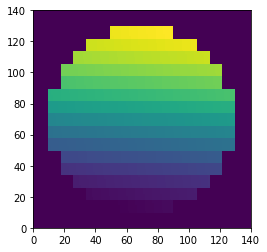

CHEC: Default


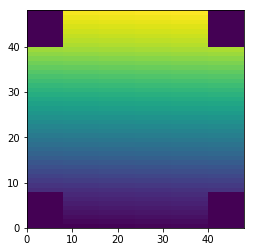

CHEC: Padding


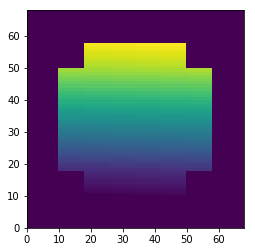

ASTRICam: Default


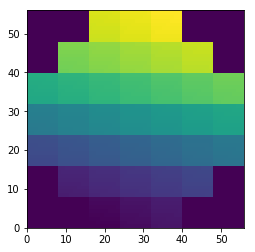

ASTRICam: Padding


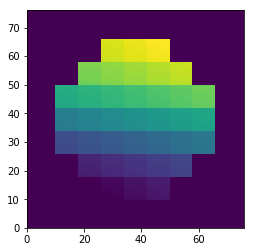

In [7]:
# Plot mapped images with and without padding
default_mapper = ImageMapper()
padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types})
for cam in camera_types:
    print('{}: Default'.format(cam))
    image = default_mapper.map_image(test_pixel_values[cam], cam)
    plot_image(image)
    print('{}: Padding'.format(cam))
    image = padding_mapper.map_image(test_pixel_values[cam], cam)
    plot_image(image)

LSTCam: oversampling
93.5 µs ± 579 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


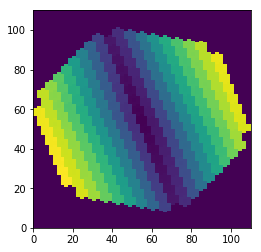

LSTCam: rebinning
107 µs ± 368 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


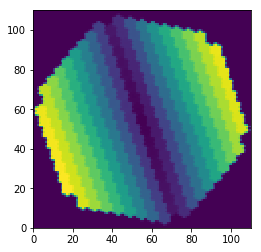

LSTCam: nearest_interpolation
100 µs ± 3.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


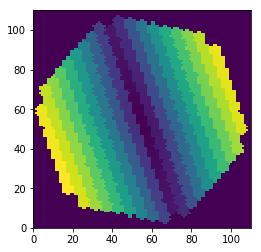

LSTCam: bilinear_interpolation
113 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


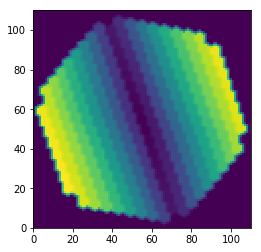

LSTCam: bicubic_interpolation
178 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


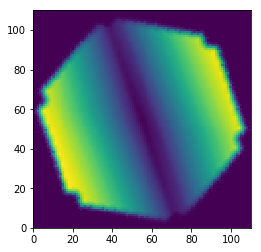

LSTCam: image_shifting
84.7 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


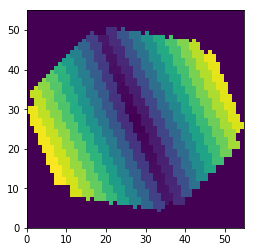

LSTCam: axial_addressing
83.5 µs ± 228 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


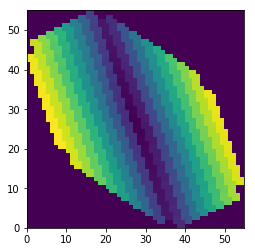

FlashCam: oversampling
95 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


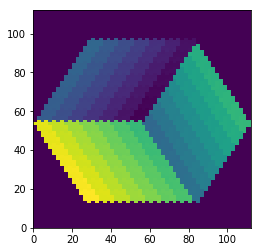

FlashCam: rebinning
107 µs ± 2.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


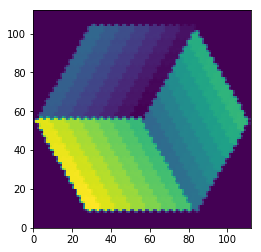

FlashCam: nearest_interpolation
98.9 µs ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


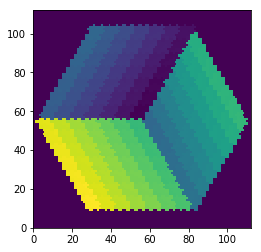

FlashCam: bilinear_interpolation
112 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


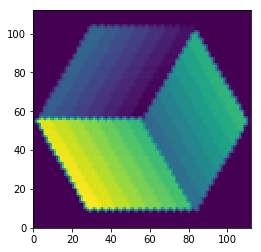

FlashCam: bicubic_interpolation
157 µs ± 489 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


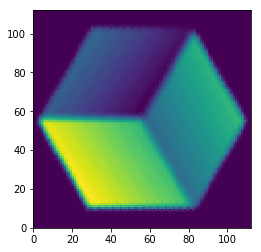

FlashCam: image_shifting
83.5 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


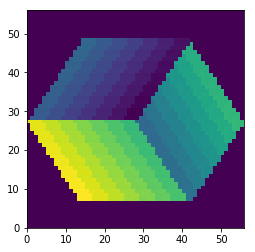

FlashCam: axial_addressing
85 µs ± 2.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


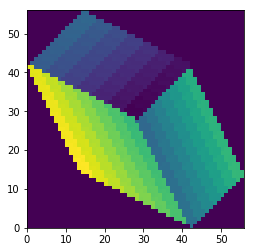

NectarCam: oversampling
97.4 µs ± 4.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


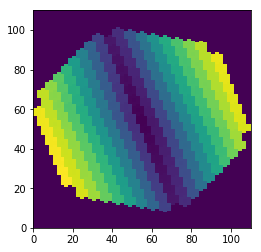

NectarCam: rebinning
109 µs ± 346 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


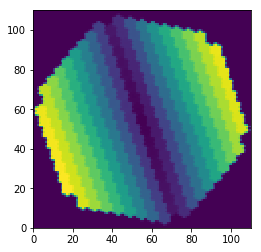

NectarCam: nearest_interpolation
98.8 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


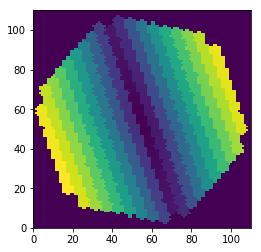

NectarCam: bilinear_interpolation
113 µs ± 990 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


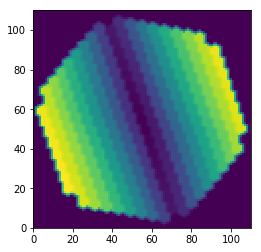

NectarCam: bicubic_interpolation
167 µs ± 8.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


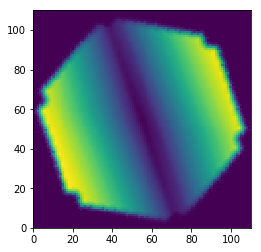

NectarCam: image_shifting
84.7 µs ± 31.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


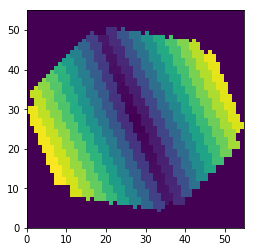

NectarCam: axial_addressing
86.2 µs ± 2.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


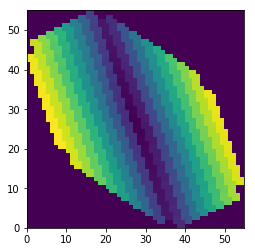

DigiCam: oversampling
90.2 µs ± 287 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


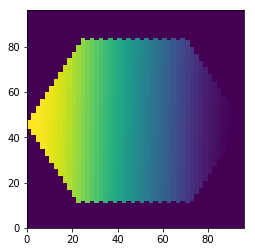

DigiCam: rebinning
97.9 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


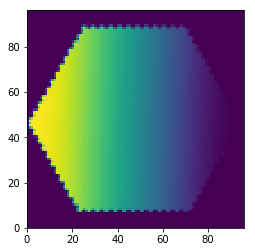

DigiCam: nearest_interpolation
91.4 µs ± 262 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


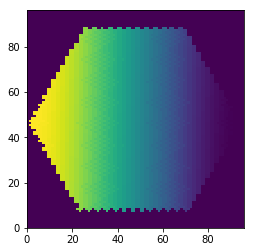

DigiCam: bilinear_interpolation
102 µs ± 155 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


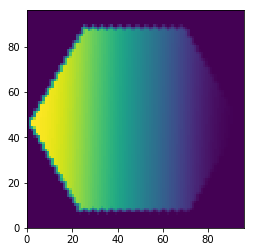

DigiCam: bicubic_interpolation
145 µs ± 8.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


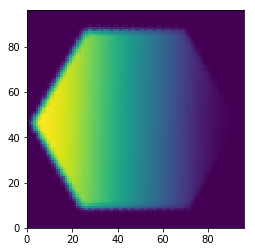

DigiCam: image_shifting
82.8 µs ± 491 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


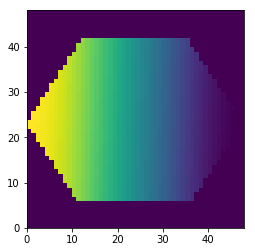

DigiCam: axial_addressing
83.3 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


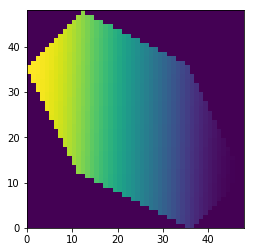

VERITAS: oversampling
82.8 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


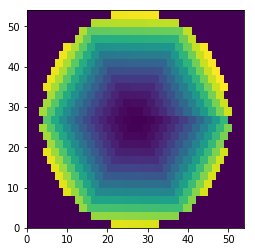

VERITAS: rebinning
87.9 µs ± 3.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


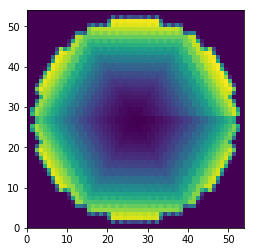

VERITAS: nearest_interpolation
82.9 µs ± 842 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


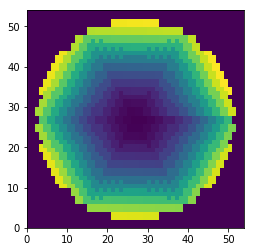

VERITAS: bilinear_interpolation
87 µs ± 892 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


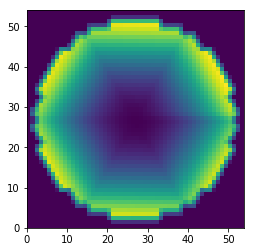

VERITAS: bicubic_interpolation
101 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


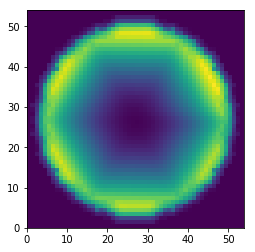

VERITAS: image_shifting
81.2 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


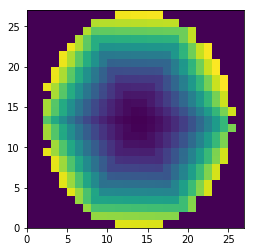

VERITAS: axial_addressing
79.9 µs ± 797 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


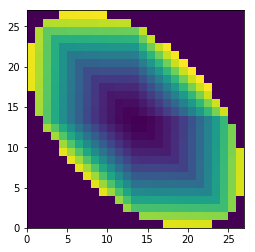

MAGICCam: oversampling
87.4 µs ± 574 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


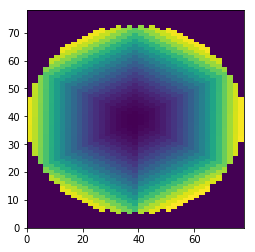

MAGICCam: rebinning
93.7 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


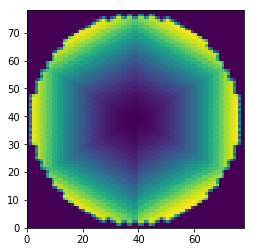

MAGICCam: nearest_interpolation
92.1 µs ± 6.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


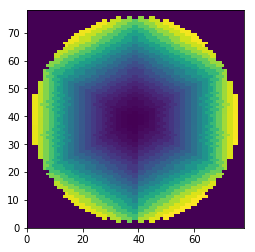

MAGICCam: bilinear_interpolation
96.5 µs ± 302 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


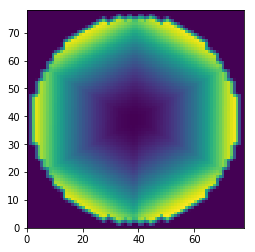

MAGICCam: bicubic_interpolation
122 µs ± 329 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


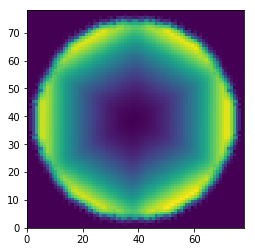

MAGICCam: image_shifting
81.4 µs ± 186 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


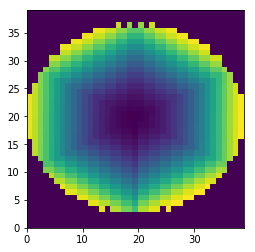

MAGICCam: axial_addressing
81.4 µs ± 271 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


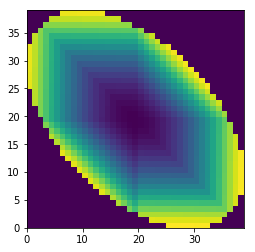

FACT: oversampling
89.8 µs ± 38.8 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


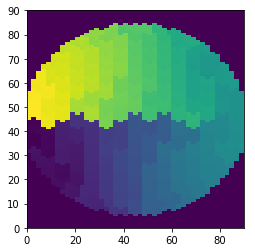

FACT: rebinning
99.4 µs ± 100 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


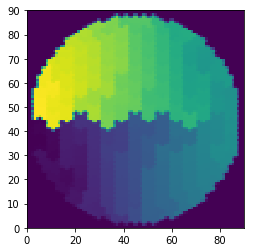

FACT: nearest_interpolation
92.2 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


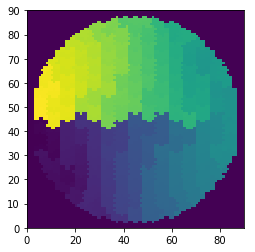

FACT: bilinear_interpolation
108 µs ± 5.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


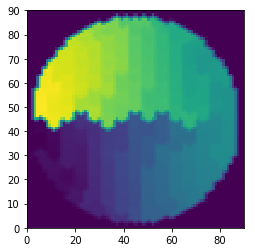

FACT: bicubic_interpolation
142 µs ± 5.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


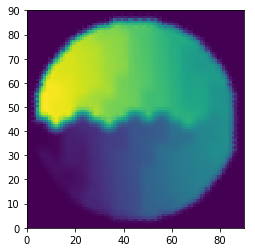

FACT: image_shifting
84 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


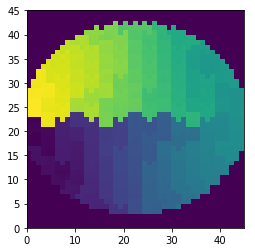

FACT: axial_addressing
88.5 µs ± 5.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


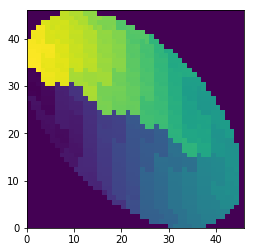

HESS-I: oversampling
86.5 µs ± 943 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


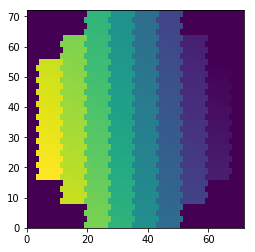

HESS-I: rebinning
93.7 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


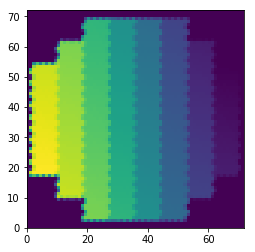

HESS-I: nearest_interpolation
87.5 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


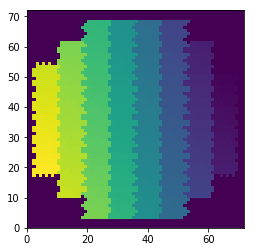

HESS-I: bilinear_interpolation
93.9 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


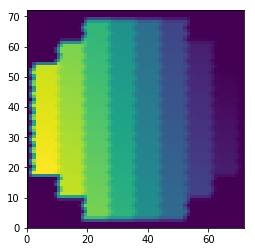

HESS-I: bicubic_interpolation
119 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


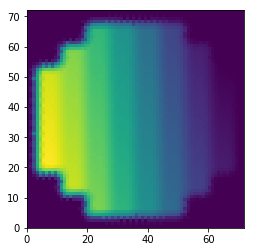

HESS-I: image_shifting
81.3 µs ± 357 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


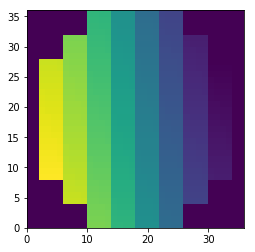

HESS-I: axial_addressing
85 µs ± 5.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


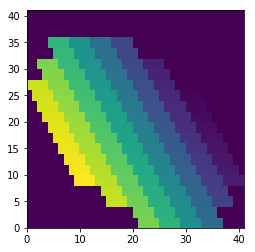

HESS-II: oversampling
98.3 µs ± 4.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


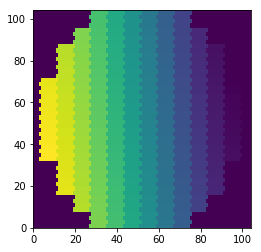

HESS-II: rebinning
106 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


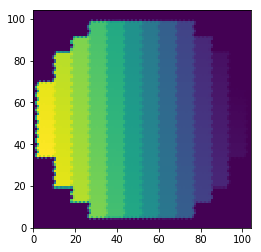

HESS-II: nearest_interpolation
99.4 µs ± 4.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


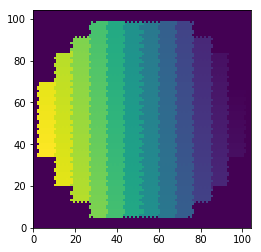

HESS-II: bilinear_interpolation
110 µs ± 657 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


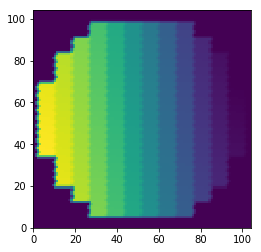

HESS-II: bicubic_interpolation
161 µs ± 556 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


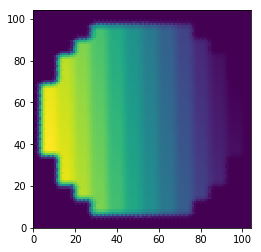

HESS-II: image_shifting
83.7 µs ± 180 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


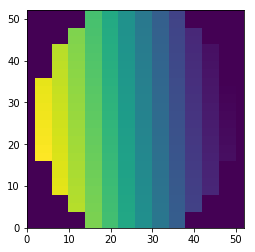

HESS-II: axial_addressing
89.5 µs ± 3.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


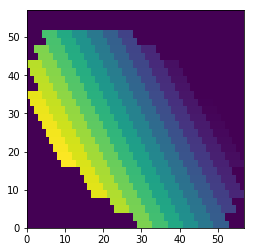

SCTCam: oversampling
118 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


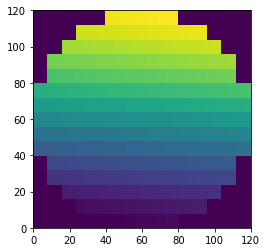

SCTCam: rebinning
138 µs ± 3.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


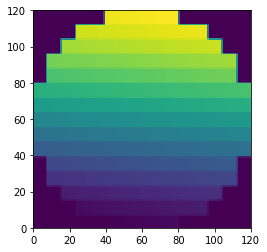

SCTCam: nearest_interpolation
119 µs ± 5.82 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


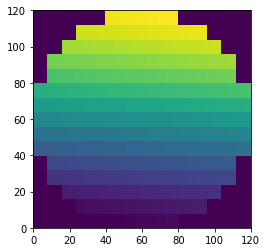

SCTCam: bilinear_interpolation
144 µs ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


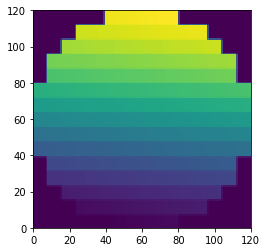

SCTCam: bicubic_interpolation
247 µs ± 2.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


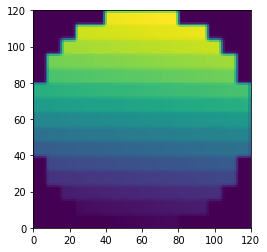

SCTCam: image_shifting
118 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


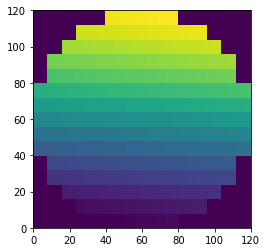

SCTCam: axial_addressing
116 µs ± 4.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


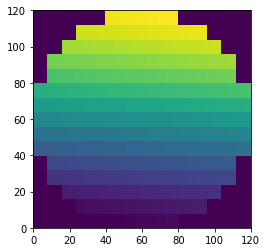

CHEC: oversampling
86.5 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


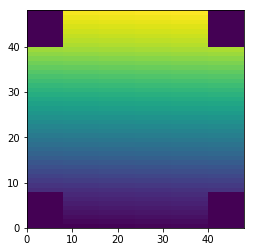

CHEC: rebinning
93.5 µs ± 3.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


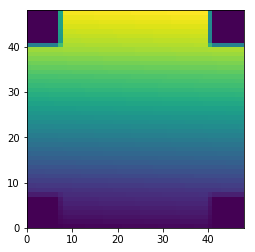

CHEC: nearest_interpolation
88.6 µs ± 1.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


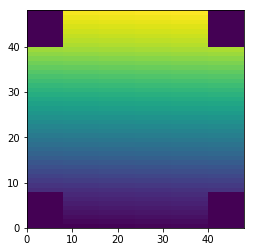

CHEC: bilinear_interpolation
97.6 µs ± 6.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


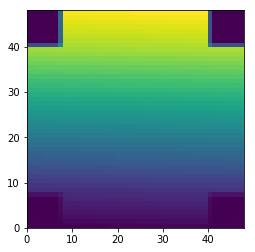

CHEC: bicubic_interpolation
118 µs ± 9.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


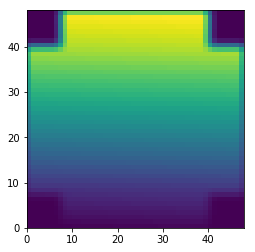

CHEC: image_shifting
84.4 µs ± 291 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


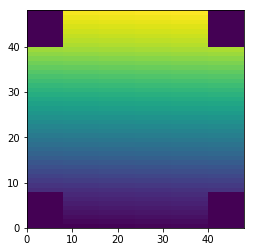

CHEC: axial_addressing
85.9 µs ± 2.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


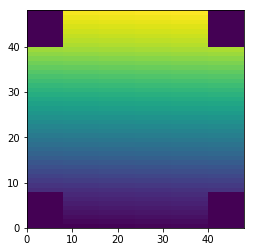

ASTRICam: oversampling
85.8 µs ± 939 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


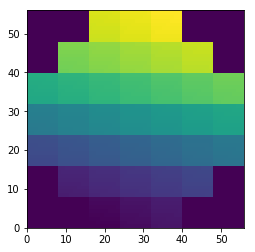

ASTRICam: rebinning
93.5 µs ± 5.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


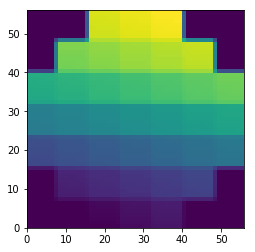

ASTRICam: nearest_interpolation
87.1 µs ± 4.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


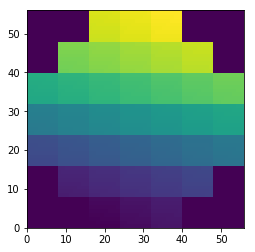

ASTRICam: bilinear_interpolation
95.2 µs ± 1.82 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


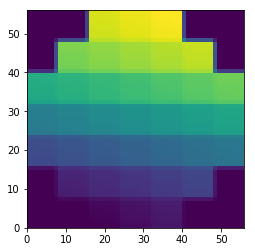

ASTRICam: bicubic_interpolation
118 µs ± 5.66 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


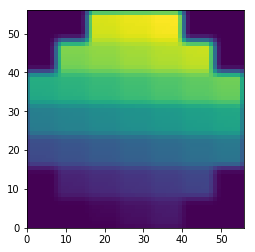

ASTRICam: image_shifting
85.6 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


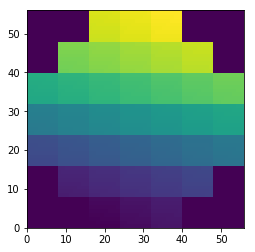

ASTRICam: axial_addressing
85.7 µs ± 2.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


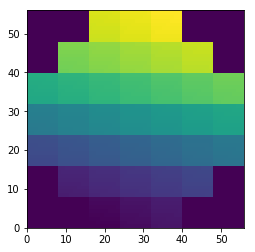

In [8]:
# Plot mapped images for each camera type and hexagonal mapping method
for cam in camera_types:
    for method in hex_methods:
        print('{}: {}'.format(cam, method))
        %timeit mappers[method].map_image(test_pixel_values[cam], cam)
        image = mappers[method].map_image(test_pixel_values[cam], cam)
        plot_image(image)

LSTCam: unmasked - masked


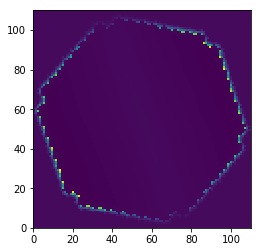

FlashCam: unmasked - masked


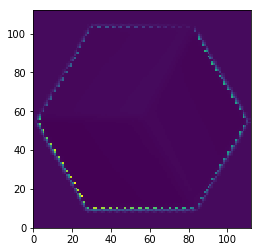

NectarCam: unmasked - masked


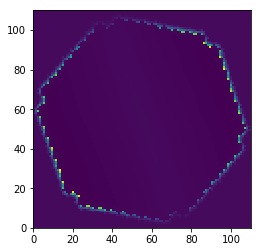

DigiCam: unmasked - masked


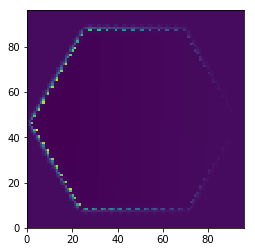

VERITAS: unmasked - masked


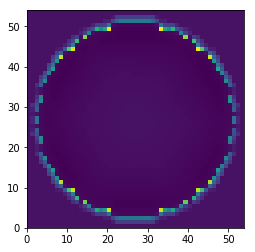

MAGICCam: unmasked - masked


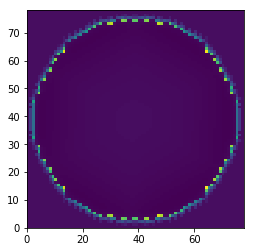

FACT: unmasked - masked


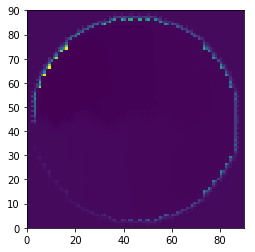

HESS-I: unmasked - masked


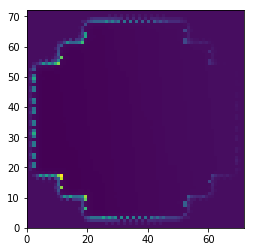

HESS-II: unmasked - masked


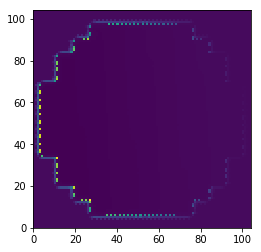

SCTCam: unmasked - masked


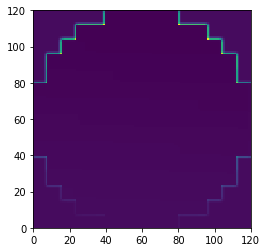

CHEC: unmasked - masked


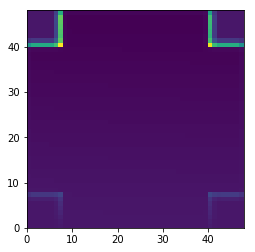

ASTRICam: unmasked - masked


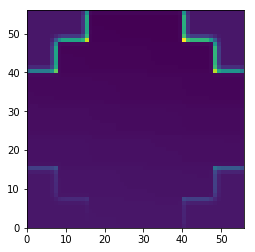

In [9]:
# Compare masked and non-masked interpolation
masked_mapper = ImageMapper(mapping_method={cam: 'bicubic_interpolation' for cam in camera_types}, mask_interpolation=True)
unmasked_mapper = ImageMapper(mapping_method={cam: 'bicubic_interpolation' for cam in camera_types}, mask_interpolation=False)
for cam in camera_types:
    print('{}: unmasked - masked'.format(cam))
    image = unmasked_mapper.map_image(test_pixel_values[cam], cam) - masked_mapper.map_image(test_pixel_values[cam], cam)
    plot_image(image)